### Code for PCA and Hierarchical Clustering

"Unveiling the Design Rules for Tunable Emission in Graphene Quantum Dots: A High-Throughput TDDFT and Machine Learning Perspective", https://arxiv.org/abs/2408.05594

# Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
df = pd.read_csv("gqd_data.csv", names=['name', 'Energy_eV', 'wavelength_nm', 'osc_strength', 'size', 'shape', 'dopant', 'dopant_percentage'], header=0)

print(len(df))
print("Unique shapes: ",df['shape'].unique())
df


284
Unique shapes:  ['square' 'amorph' 'hexagonal']


,name,Energy_eV,wavelength_nm,osc_strength,size,shape,dopant,dopant_percentage
0,1.5nm-square,0.1804,6873.68,0.0006,1.5nm,square,pristine,0.0
1,1.5nm-square-B-5.0,0.2344,5289.57,0.0070,1.5nm,square,B,5.0
2,1.5nm-square-BN-1.5,0.2035,6093.04,0.1134,1.5nm,square,BN,1.5
3,1.5nm-square-BN-3.0,0.7697,1610.88,0.5382,1.5nm,square,BN,3.0
4,1.5nm-square-BN-7.0,0.2568,4828.05,0.1517,1.5nm,square,BN,7.0
...,...,...,...,...,...,...,...,...
279,hexagonal3-S-3.0,0.9833,1260.96,0.9923,hexagonal3,hexagonal,S,3.0
280,hexagonal3-S-5.0,0.9018,1374.78,0.4837,hexagonal3,hexagonal,S,5.0
281,hexagonal3-S-7.0,0.7342,1688.65,0.1676,hexagonal3,hexagonal,S,7.0
282,hexagonal3-SP-3.0,0.7318,1694.27,0.3926,hexagonal3,hexagonal,SP,3.0


In [3]:
df["shape"].unique()

array(['square', 'amorph', 'hexagonal'], dtype=object)

### Hierarchical Clustering for f>0.5

In [4]:
df = pd.read_csv("gqd_data.csv", names=['name', 'Energy_eV', 'wavelength_nm', 'osc_strength', 'size', 'shape', 'dopant', 'dopant_percentage'], header=0)

print(len(df))
print("Unique shapes: ",df['shape'].unique())
df


284
Unique shapes:  ['square' 'amorph' 'hexagonal']


,name,Energy_eV,wavelength_nm,osc_strength,size,shape,dopant,dopant_percentage
0,1.5nm-square,0.1804,6873.68,0.0006,1.5nm,square,pristine,0.0
1,1.5nm-square-B-5.0,0.2344,5289.57,0.0070,1.5nm,square,B,5.0
2,1.5nm-square-BN-1.5,0.2035,6093.04,0.1134,1.5nm,square,BN,1.5
3,1.5nm-square-BN-3.0,0.7697,1610.88,0.5382,1.5nm,square,BN,3.0
4,1.5nm-square-BN-7.0,0.2568,4828.05,0.1517,1.5nm,square,BN,7.0
...,...,...,...,...,...,...,...,...
279,hexagonal3-S-3.0,0.9833,1260.96,0.9923,hexagonal3,hexagonal,S,3.0
280,hexagonal3-S-5.0,0.9018,1374.78,0.4837,hexagonal3,hexagonal,S,5.0
281,hexagonal3-S-7.0,0.7342,1688.65,0.1676,hexagonal3,hexagonal,S,7.0
282,hexagonal3-SP-3.0,0.7318,1694.27,0.3926,hexagonal3,hexagonal,SP,3.0


In [5]:
df = df.copy()
df = df[df['osc_strength'] >= 0.5]
len(df)

33

In [6]:
# Map the shape labels to the desired format
shape_mapping = {
    'amorph': 'Amorphous',
    'hexagonal': 'Hexagonal',
    'square': 'Square'
}

df['shape_new'] = df['shape'].map(shape_mapping)
df

# Create df2 with the specified columns
#df2 = df[['name','Energy_eV', 'osc_strength', 'size', 'dopant', 'dopant_percentage', 'shape_new']].copy()
#df2

,name,Energy_eV,wavelength_nm,osc_strength,size,shape,dopant,dopant_percentage,shape_new
3,1.5nm-square-BN-3.0,0.7697,1610.88,0.5382,1.5nm,square,BN,3.0,Square
28,1nm-square-B-5.0,1.4777,839.05,1.2744,1nm,square,B,5.0,Square
30,1nm-square-BN-5.0,0.9177,1350.99,0.9383,1nm,square,BN,5.0,Square
36,1nm-square-BP-5.0,1.1916,1040.51,1.0325,1nm,square,BP,5.0,Square
47,1nm-square-NP-5.0,1.3178,940.85,1.0265,1nm,square,NP,5.0,Square
50,1nm-square-NS-5.0,1.0190,1216.72,1.0193,1nm,square,NS,5.0,Square
57,1nm-square-P-5.0,1.4273,868.68,1.3759,1nm,square,P,5.0,Square
62,2nm-square-B-3.0,0.4644,2669.73,0.8163,2nm,square,B,3.0,Square
69,2nm-square-N-3.0,0.4234,2928.05,0.7017,2nm,square,N,3.0,Square
71,2nm-square-NO-1.5,0.5323,2329.13,0.9898,2nm,square,NO,1.5,Square


In [7]:
# Apply transformations to the 'name' column

# 1. Change 'amorph' to 'Amo' (case-sensitive)
df['name'] = df['name'].str.replace('amorph', 'Amo', regex=False)

# 2. Remove '.0' at the end of the name
df['name'] = df['name'].str.rstrip('.0')

# 3. Change 'hexagonal' to 'Hex' (case-sensitive)
df['name'] = df['name'].str.replace('hexagonal', 'Hex', regex=False)

# 4. Change 'square' to 'Sqr' (case-sensitive)
df['name'] = df['name'].str.replace('square', 'Sqr', regex=False)

# Optional: View the updated 'name' column
df

,name,Energy_eV,wavelength_nm,osc_strength,size,shape,dopant,dopant_percentage,shape_new
3,1.5nm-Sqr-BN-3,0.7697,1610.88,0.5382,1.5nm,square,BN,3.0,Square
28,1nm-Sqr-B-5,1.4777,839.05,1.2744,1nm,square,B,5.0,Square
30,1nm-Sqr-BN-5,0.9177,1350.99,0.9383,1nm,square,BN,5.0,Square
36,1nm-Sqr-BP-5,1.1916,1040.51,1.0325,1nm,square,BP,5.0,Square
47,1nm-Sqr-NP-5,1.3178,940.85,1.0265,1nm,square,NP,5.0,Square
50,1nm-Sqr-NS-5,1.0190,1216.72,1.0193,1nm,square,NS,5.0,Square
57,1nm-Sqr-P-5,1.4273,868.68,1.3759,1nm,square,P,5.0,Square
62,2nm-Sqr-B-3,0.4644,2669.73,0.8163,2nm,square,B,3.0,Square
69,2nm-Sqr-N-3,0.4234,2928.05,0.7017,2nm,square,N,3.0,Square
71,2nm-Sqr-NO-1.5,0.5323,2329.13,0.9898,2nm,square,NO,1.5,Square


In [8]:
mask = df['name'] != 'Amo4'
df.loc[mask, 'name'] = df.loc[mask, 'name'] + '%'
df

,name,Energy_eV,wavelength_nm,osc_strength,size,shape,dopant,dopant_percentage,shape_new
3,1.5nm-Sqr-BN-3%,0.7697,1610.88,0.5382,1.5nm,square,BN,3.0,Square
28,1nm-Sqr-B-5%,1.4777,839.05,1.2744,1nm,square,B,5.0,Square
30,1nm-Sqr-BN-5%,0.9177,1350.99,0.9383,1nm,square,BN,5.0,Square
36,1nm-Sqr-BP-5%,1.1916,1040.51,1.0325,1nm,square,BP,5.0,Square
47,1nm-Sqr-NP-5%,1.3178,940.85,1.0265,1nm,square,NP,5.0,Square
50,1nm-Sqr-NS-5%,1.0190,1216.72,1.0193,1nm,square,NS,5.0,Square
57,1nm-Sqr-P-5%,1.4273,868.68,1.3759,1nm,square,P,5.0,Square
62,2nm-Sqr-B-3%,0.4644,2669.73,0.8163,2nm,square,B,3.0,Square
69,2nm-Sqr-N-3%,0.4234,2928.05,0.7017,2nm,square,N,3.0,Square
71,2nm-Sqr-NO-1.5%,0.5323,2329.13,0.9898,2nm,square,NO,1.5,Square


In [10]:
#uses scikit-learn version 1.2

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Create df2 with the specified columns
df2 = df[['name', 'Energy_eV', 'osc_strength', 'size', 'dopant', 'dopant_percentage', 'shape_new']].copy()
print(len(df2))
# One-hot encode the categorical columns
categorical_cols = ['size', 'dopant', 'shape_new']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(df2[categorical_cols])

# Get the new column names for the encoded columns
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame with the encoded categorical data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df2.index)

# Drop the original categorical columns and concatenate the encoded columns
df2_encoded = df2.drop(columns=categorical_cols).join(encoded_df)

# Scaling the numerical columns
numerical_cols = ['Energy_eV', 'osc_strength', 'dopant_percentage']

scaler = StandardScaler()
df2_encoded[numerical_cols] = scaler.fit_transform(df2_encoded[numerical_cols])

33


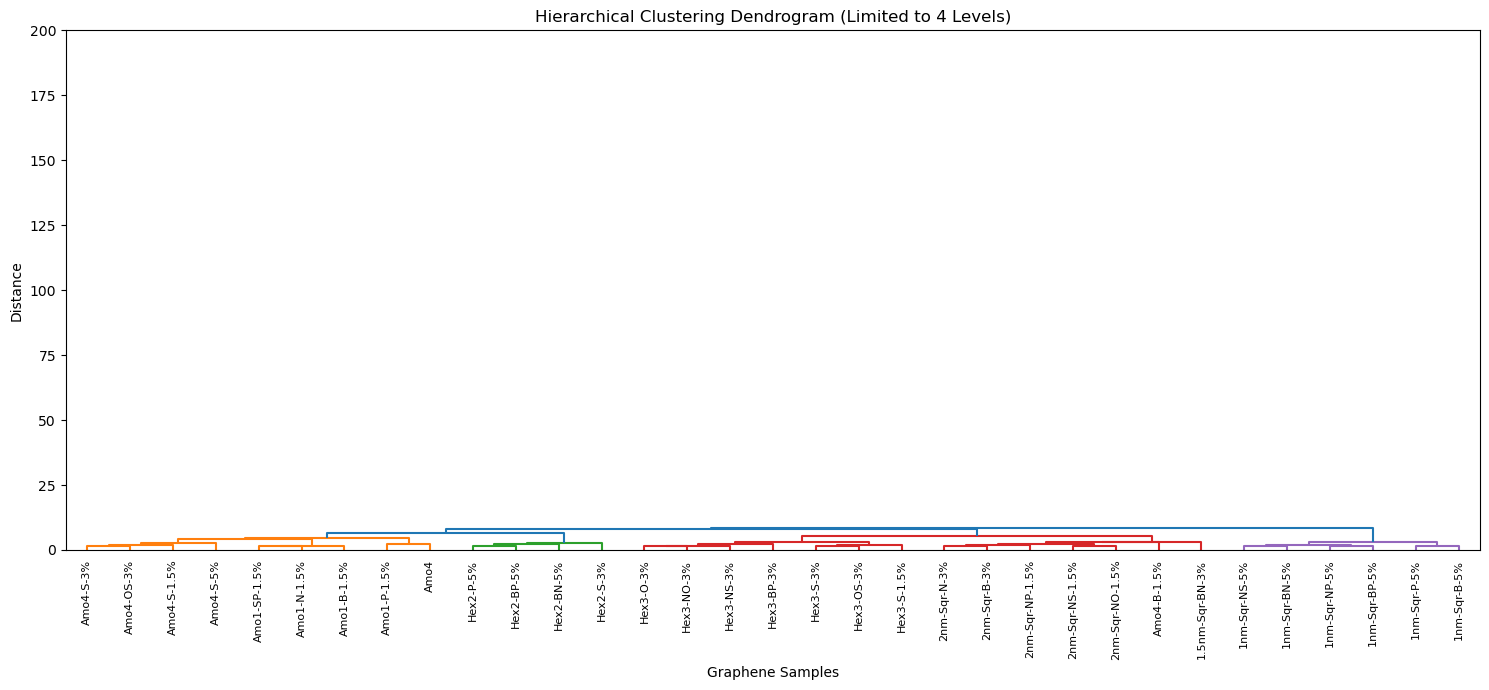

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix using Ward's method
linked = linkage(df2_encoded.drop(columns='name'), method='ward')

# Plot the full dendrogram
plt.figure(figsize=(15, 7))

dendrogram(
    linked,
    labels=df2['name'].tolist(),  # Use the graphene names as labels
    distance_sort='descending',
    show_leaf_counts=False,
)

# Limit the y-axis (distance) to zoom into the top 4 levels
plt.ylim(0, 200)  # Adjust the value 200 based on the distance metric to cover the first 4 levels

plt.title('Hierarchical Clustering Dendrogram (Limited to 4 Levels)')
plt.xlabel('Graphene Samples')
plt.ylabel('Distance')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

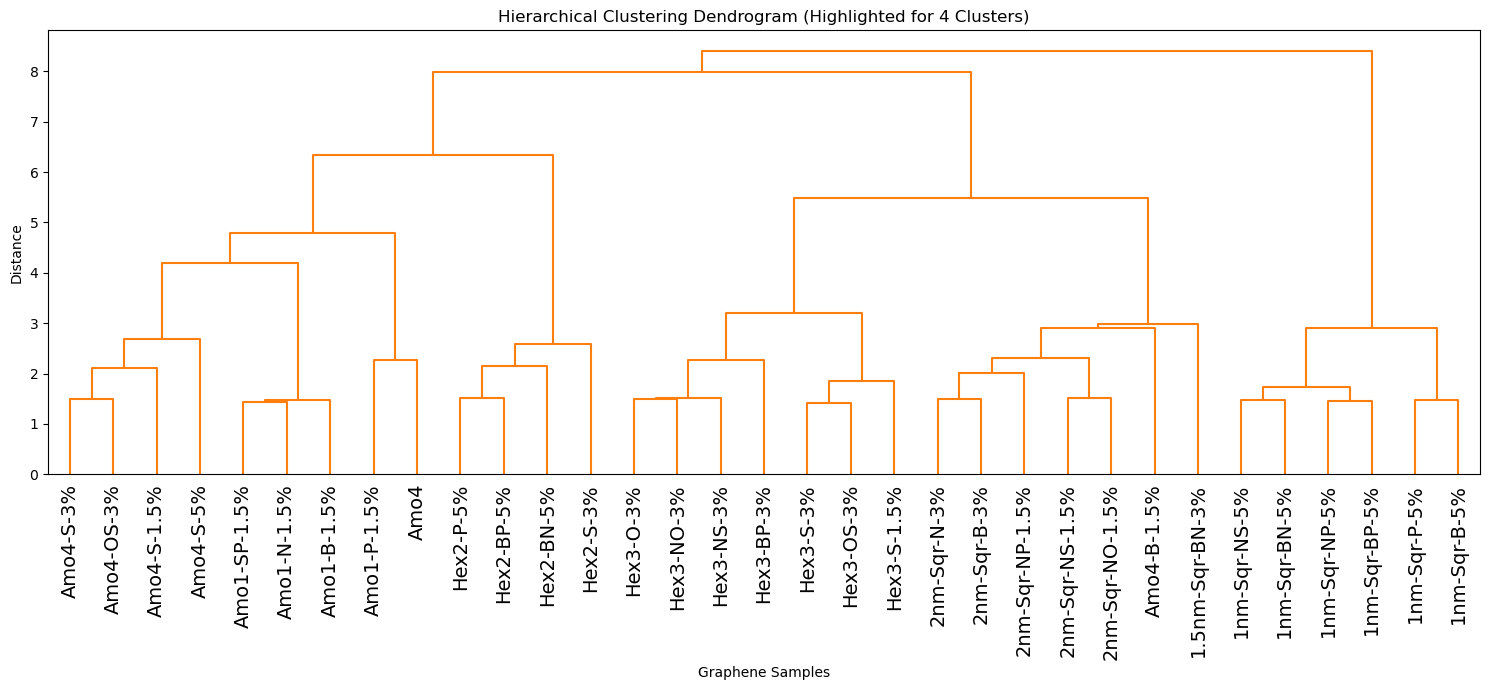

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix using Ward's method
linked = linkage(df2_encoded.drop(columns='name'), method='ward')

# Plot the dendrogram and highlight 4 clusters
plt.figure(figsize=(15, 7))

dendrogram(
    linked,
    labels=df2['name'].tolist(),  # Use the graphene names as labels
    color_threshold=50,  # Adjust the distance value to show exactly 4 clusters
    distance_sort='descending',
    show_leaf_counts=False,
)

plt.title('Hierarchical Clustering Dendrogram (Highlighted for 4 Clusters)')
plt.xlabel('Graphene Samples')
plt.ylabel('Distance')
plt.xticks(rotation=90, fontsize=14)
plt.tight_layout()
plt.show()

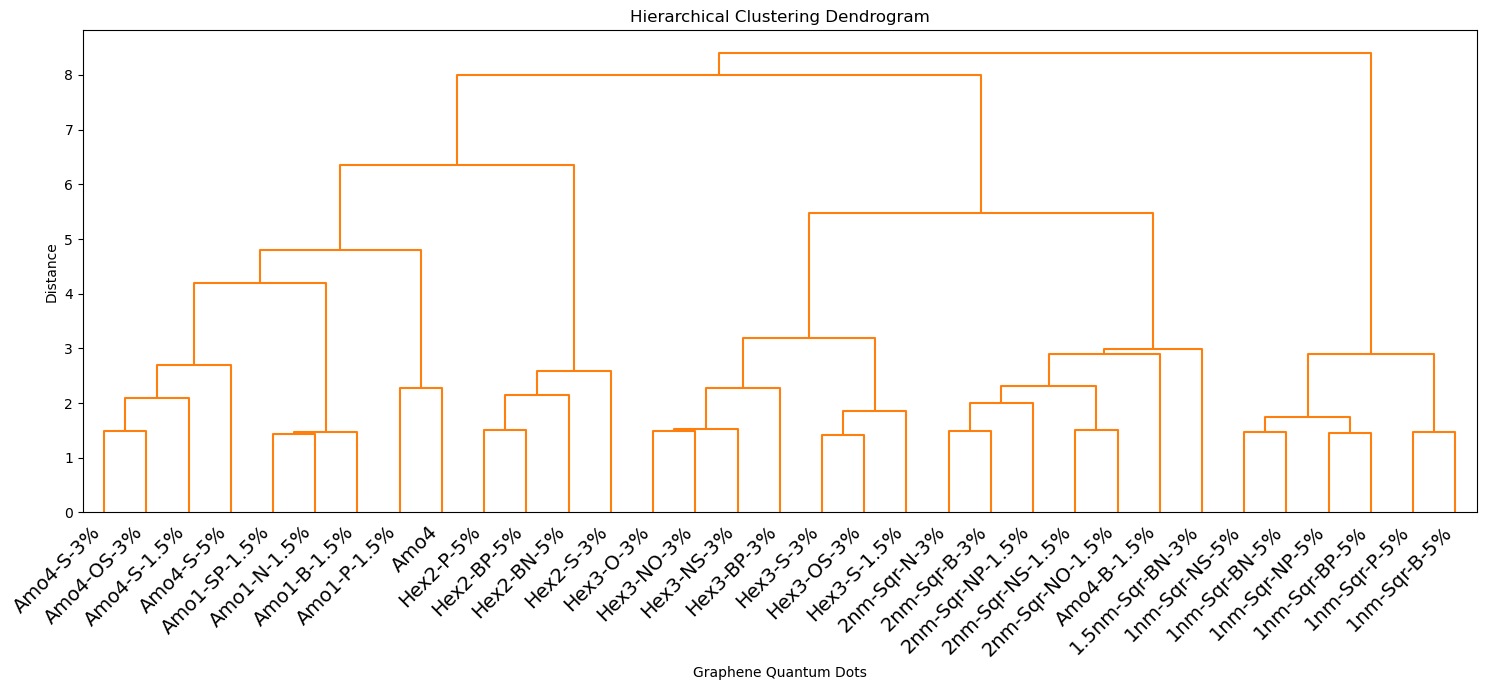

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix using Ward's method
linked = linkage(df2_encoded.drop(columns='name'), method='ward')

# Plot the dendrogram and highlight 4 clusters
plt.figure(figsize=(15, 7))

dendrogram(
    linked,
    labels=df2['name'].tolist(),  # Use the graphene names as labels
    color_threshold=50,  # Adjust the distance value to show exactly 4 clusters
    distance_sort='descending',
    show_leaf_counts=False,
)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Graphene Quantum Dots')
plt.ylabel('Distance')

# Rotate x-tick labels by 45 degrees and adjust fontsize
plt.xticks(rotation=45, ha='right', fontsize=14)  # ha='right' ensures the labels are aligned properly

plt.tight_layout()
plt.show()

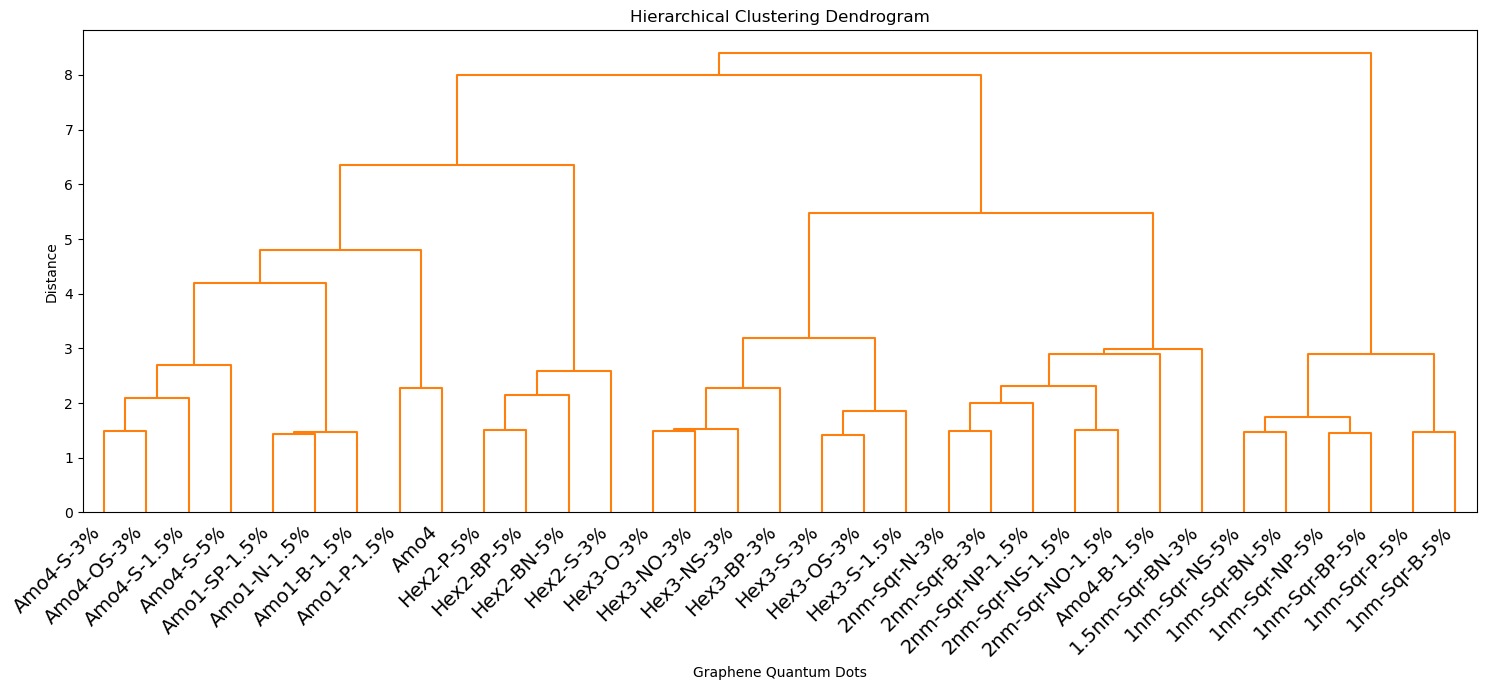

Number of clusters at various levels:
At distance threshold 0.00, number of clusters = 33
At distance threshold 0.93, number of clusters = 33
At distance threshold 1.87, number of clusters = 19
At distance threshold 2.80, number of clusters = 11
At distance threshold 3.73, number of clusters = 7
At distance threshold 4.66, number of clusters = 6
At distance threshold 5.60, number of clusters = 4
At distance threshold 6.53, number of clusters = 3
At distance threshold 7.46, number of clusters = 3
At distance threshold 8.40, number of clusters = 1


In [14]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Compute the linkage matrix using Ward's method
linked = linkage(df2_encoded.drop(columns='name'), method='ward')

# Plot the dendrogram and highlight 4 clusters
plt.figure(figsize=(15, 7))

dendrogram(
    linked,
    labels=df2['name'].tolist(),  # Use the graphene names as labels
    color_threshold=50,  # Adjust the distance value to show exactly 4 clusters
    distance_sort='descending',
    show_leaf_counts=False,
)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Graphene Quantum Dots')
plt.ylabel('Distance')

# Rotate x-tick labels by 45 degrees and adjust fontsize
plt.xticks(rotation=45, ha='right', fontsize=14)  # ha='right' ensures the labels are aligned properly

plt.tight_layout()
plt.show()

# -------- Code to Calculate the Number of Clusters at Different Levels --------

# Get the maximum distance from the dendrogram to identify all possible levels
max_distance = np.max(linked[:, 2])

# Define different distance thresholds to analyze
# You can decide to use a specific number of steps (e.g., 10)
distance_thresholds = np.linspace(0, max_distance, num=10)

print("Number of clusters at various levels:")
for threshold in distance_thresholds:
    clusters = fcluster(linked, t=threshold, criterion='distance')
    num_clusters = len(set(clusters))
    print(f"At distance threshold {threshold:.2f}, number of clusters = {num_clusters}")

In [15]:
threshold = 5    
clusters = fcluster(linked, t=threshold, criterion='distance')
num_clusters = len(set(clusters))
print(f"At distance threshold {threshold:.2f}, number of clusters = {num_clusters}")

At distance threshold 5.00, number of clusters = 5


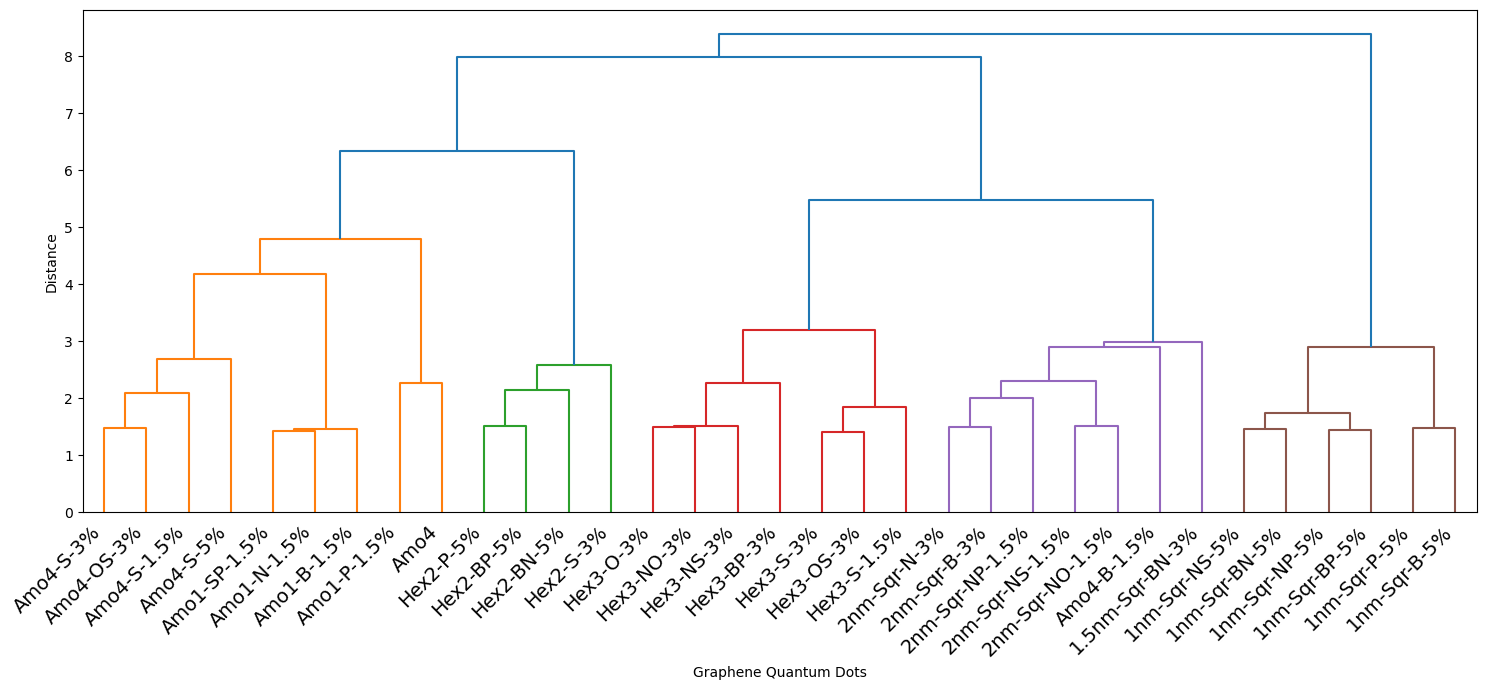

In [16]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Compute the linkage matrix using Ward's method
linked = linkage(df2_encoded.drop(columns='name'), method='ward')

# Set the desired distance threshold to color clusters
distance_threshold = 5

# Plot the dendrogram and color clusters at the distance threshold
plt.figure(figsize=(15, 7))

dendrogram(
    linked,
    labels=df2['name'].tolist(),  # Use the graphene names as labels
    color_threshold=distance_threshold,  # Color clusters below this distance
    distance_sort='descending',
    show_leaf_counts=False,
)

#plt.title(f'Hierarchical Clustering Dendrogram')
plt.xlabel('Graphene Quantum Dots')
plt.ylabel('Distance')

# Rotate x-tick labels by 45 degrees and adjust fontsize
plt.xticks(rotation=45, ha='right', fontsize=14)  # ha='right' ensures the labels are aligned properly

plt.savefig('dendrogram_plot.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


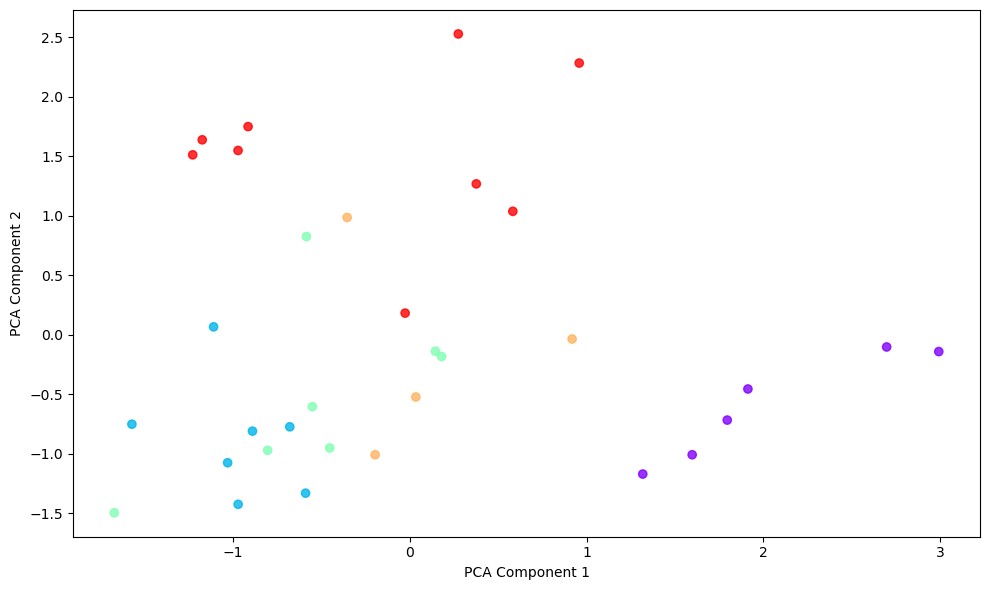


PCA Loadings for the First Two Principal Components:
                          PC1       PC2
Energy_eV            0.407253  0.708410
osc_strength         0.624854  0.042717
dopant_percentage    0.554833 -0.453267
size_1.5nm          -0.019260 -0.019194
size_1nm             0.266327 -0.085160
size_2nm            -0.104777 -0.127014
size_amorph1        -0.051046  0.170690
size_amorph4        -0.018958  0.157638
size_hexagonal2      0.008660 -0.013665
size_hexagonal3     -0.080947 -0.083295
dopant_B             0.001774  0.009214
dopant_BN            0.029099 -0.047764
dopant_BP           -0.001583 -0.076388
dopant_N            -0.046417  0.005133
dopant_NO           -0.032090 -0.041347
dopant_NP            0.007355 -0.028595
dopant_NS            0.002447 -0.071960
dopant_O            -0.011925 -0.014315
dopant_OS            0.016487  0.020353
dopant_P             0.086177  0.038551
dopant_S            -0.030681  0.111123
dopant_SP           -0.026571  0.035937
dopant_pristine      0.005

In [17]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df2_encoded is already prepared and encoded appropriately

# Step 1: Compute the linkage matrix using Ward's method
linked = linkage(df2_encoded.drop(columns='name'), method='ward')

# Step 2: Get the clusters at the distance threshold of 5
distance_threshold = 5
clusters = fcluster(linked, t=distance_threshold, criterion='distance')

# Step 3: Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df2_encoded.drop(columns='name'))

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'], index=df2_encoded.index)

# Add the cluster labels to the PCA DataFrame for coloring
pca_df['cluster'] = clusters

# Step 4: Plot the PCA components colored by the clusters from hierarchical clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='rainbow', alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
#plt.title('PCA Plot of GQD Data (Colored by Cluster)')

# Add color bar to indicate clusters
#plt.colorbar(scatter, label='Cluster')
plt.savefig('PCA.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

# Step 5: Print the PCA loadings for the two principal components
# Get the loadings for the original features
loadings = pca.components_

# Get feature names from df2_encoded
feature_names = df2_encoded.drop(columns='name').columns

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, index=feature_names, columns=['PC1', 'PC2'])

# Print the PCA loadings
print("\nPCA Loadings for the First Two Principal Components:")
print(loadings_df)

In [18]:
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df2_encoded.drop(columns='name'))

# Get the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Get the loadings (coefficients) for the original features
loadings = pca.components_

# Get feature names from df2_encoded
feature_names = df2_encoded.drop(columns='name').columns

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings.T, index=feature_names, columns=['PC1', 'PC2'])

# Print the explained variance for the two components
print("\nExplained Variance by Each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f} ({variance * 100:.2f}%)")

# Print the PCA loadings (importance of original features)
print("\nPCA Loadings for the First Two Principal Components:")
print(loadings_df)

# Optional: Sort loadings by importance for each component
print("\nSorted Loadings for PC1:")
print(loadings_df['PC1'].abs().sort_values(ascending=False))

print("\nSorted Loadings for PC2:")
print(loadings_df['PC2'].abs().sort_values(ascending=False))


Explained Variance by Each Principal Component:
PC1: 0.2594 (25.94%)
PC2: 0.2362 (23.62%)

PCA Loadings for the First Two Principal Components:
                          PC1       PC2
Energy_eV            0.407253  0.708410
osc_strength         0.624854  0.042717
dopant_percentage    0.554833 -0.453267
size_1.5nm          -0.019260 -0.019194
size_1nm             0.266327 -0.085160
size_2nm            -0.104777 -0.127014
size_amorph1        -0.051046  0.170690
size_amorph4        -0.018958  0.157638
size_hexagonal2      0.008660 -0.013665
size_hexagonal3     -0.080947 -0.083295
dopant_B             0.001774  0.009214
dopant_BN            0.029099 -0.047764
dopant_BP           -0.001583 -0.076388
dopant_N            -0.046417  0.005133
dopant_NO           -0.032090 -0.041347
dopant_NP            0.007355 -0.028595
dopant_NS            0.002447 -0.071960
dopant_O            -0.011925 -0.014315
dopant_OS            0.016487  0.020353
dopant_P             0.086177  0.038551
dopant_S       

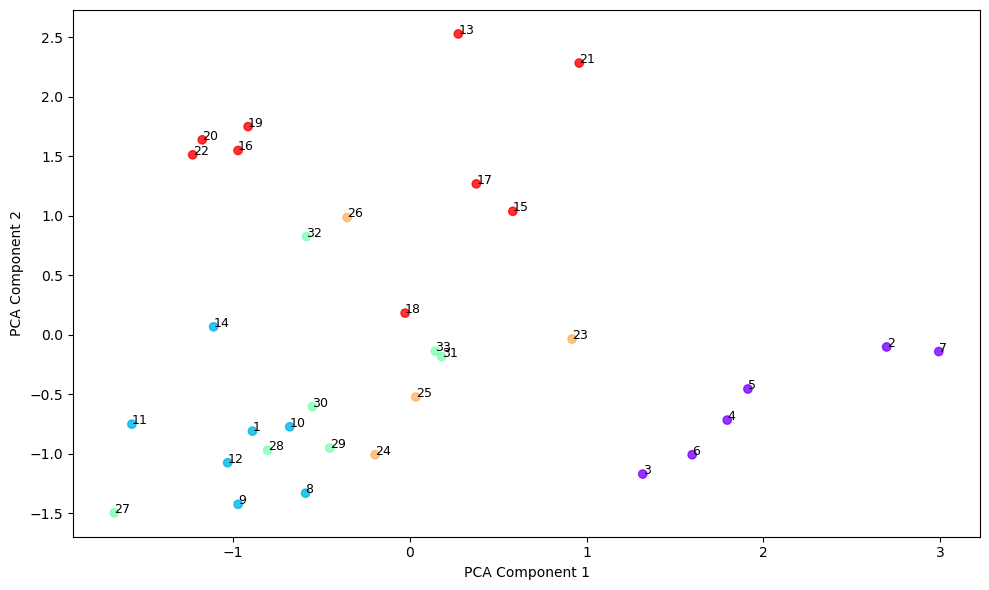


PCA Loadings for the First Two Principal Components:
                          PC1       PC2
Energy_eV            0.407253  0.708410
osc_strength         0.624854  0.042717
dopant_percentage    0.554833 -0.453267
size_1.5nm          -0.019260 -0.019194
size_1nm             0.266327 -0.085160
size_2nm            -0.104777 -0.127014
size_amorph1        -0.051046  0.170690
size_amorph4        -0.018958  0.157638
size_hexagonal2      0.008660 -0.013665
size_hexagonal3     -0.080947 -0.083295
dopant_B             0.001774  0.009214
dopant_BN            0.029099 -0.047764
dopant_BP           -0.001583 -0.076388
dopant_N            -0.046417  0.005133
dopant_NO           -0.032090 -0.041347
dopant_NP            0.007355 -0.028595
dopant_NS            0.002447 -0.071960
dopant_O            -0.011925 -0.014315
dopant_OS            0.016487  0.020353
dopant_P             0.086177  0.038551
dopant_S            -0.030681  0.111123
dopant_SP           -0.026571  0.035937
dopant_pristine      0.005

In [19]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df2_encoded is already prepared and encoded appropriately

# Step 1: Compute the linkage matrix using Ward's method
linked = linkage(df2_encoded.drop(columns='name'), method='ward')

# Step 2: Get the clusters at the distance threshold of 5
distance_threshold = 5
clusters = fcluster(linked, t=distance_threshold, criterion='distance')

# Step 3: Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df2_encoded.drop(columns='name'))

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'], index=df2_encoded.index)

# Add the cluster labels and GQD names to the PCA DataFrame for coloring and labeling
pca_df['cluster'] = clusters
pca_df['name'] = df2_encoded['name']

# Step 4: Plot the PCA components colored by the clusters from hierarchical clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='rainbow', alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Number each point on the plot
for i, (x, y) in enumerate(zip(pca_df['PCA1'], pca_df['PCA2']), start=1):
    plt.text(x, y, str(i), fontsize=9, color='black')  # Add numbers to the plot

plt.savefig('pca-numbered.png', dpi=300, bbox_inches='tight')

# Save the PCA plot
plt.tight_layout()
plt.savefig('PCA_numbered.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Print the PCA loadings for the two principal components
# Get the loadings for the original features
loadings = pca.components_

# Get feature names from df2_encoded
feature_names = df2_encoded.drop(columns='name').columns

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, index=feature_names, columns=['PC1', 'PC2'])

# Print the PCA loadings
print("\nPCA Loadings for the First Two Principal Components:")
print(loadings_df)

# Step 6: Create a list of names and corresponding numbers
print("\nList of GQD Names and Corresponding Numbers:")
gqd_list = list(zip(range(1, len(pca_df) + 1), pca_df['name']))
for number, name in gqd_list:
    print(f"{number}: {name}")

In [20]:
# Step 6: Create a list of names and corresponding numbers (comma-separated in the required format)
print("\nList of GQD Names and Corresponding Numbers (Comma Separated):")
gqd_list = list(zip(range(1, len(pca_df) + 1), pca_df['name']))

# Print the list in the format '1:GQD1, 2:GQD2, ...'
formatted_output = ", ".join([f"{number}:{name}" for number, name in gqd_list])
print(formatted_output)


List of GQD Names and Corresponding Numbers (Comma Separated):
1:1.5nm-Sqr-BN-3%, 2:1nm-Sqr-B-5%, 3:1nm-Sqr-BN-5%, 4:1nm-Sqr-BP-5%, 5:1nm-Sqr-NP-5%, 6:1nm-Sqr-NS-5%, 7:1nm-Sqr-P-5%, 8:2nm-Sqr-B-3%, 9:2nm-Sqr-N-3%, 10:2nm-Sqr-NO-1.5%, 11:2nm-Sqr-NP-1.5%, 12:2nm-Sqr-NS-1.5%, 13:Amo4, 14:Amo4-B-1.5%, 15:Amo4-OS-3%, 16:Amo4-S-1.5%, 17:Amo4-S-3%, 18:Amo4-S-5%, 19:Amo1-B-1.5%, 20:Amo1-N-1.5%, 21:Amo1-P-1.5%, 22:Amo1-SP-1.5%, 23:Hex2-BN-5%, 24:Hex2-BP-5%, 25:Hex2-P-5%, 26:Hex2-S-3%, 27:Hex3-BP-3%, 28:Hex3-NO-3%, 29:Hex3-NS-3%, 30:Hex3-O-3%, 31:Hex3-OS-3%, 32:Hex3-S-1.5%, 33:Hex3-S-3%
